In [1]:
# 2.วิเคราะห์ข้อมูลเพื่อสร้าง regression model ที่มี dependent variable คือ ยอดขายแต่ละorderและมี independent variable คือ ประเทศที่ซื้อสินค้า
# y = ยอดขายแต่ละorder หรือเท่ากับ จำนวนสินค้า * ราคาต่อหน่วย ของแต่ละ order  
# (โดยโจทย์กำหนดให้ UserId และ TransactionId	ที่เหมือนกันคือ Order เดียวกัน)
# x = ประเทศ

import pandas as pd
df = pd.read_csv('transaction_data_clean.csv') # Load ข้อมูลที่ Clean แล้วขึ้นมา

In [2]:
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
1586007,261681,6153092,Wed Sep 19 06:23:00 IST 2018,477330,ALARM CLOCK BAKELIKE IVORY,12,5.18,Switzerland
1586008,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1586009,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1586010,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [3]:
# สร้าง column ใหม่ชื่อ y_order
df['y_order'] = df['NumberOfItemsPurchased'] * df['CostPerItem'] 

In [4]:
df.head()
# สังเกตจะมี column ใหม่เพิ่มขึ้นมาคือ column: y_order

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,y_order
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,10.56
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,64.80
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,5.19
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom,42.24


In [5]:
# ตัวแปร y_var เก็บค่าผลรวมยอดขายทั้งหมดที่อยู่ใน TransactionId เดียวกันถือเป็น Order เดียวกัน
y_var = df.groupby('TransactionId')['y_order'].sum()

In [6]:
y_var

TransactionId
5900015    2305.20
5900026     368.64
5900037    4622.16
5900048    1161.36
5900059     295.92
            ...   
6397413    2070.72
6397424    2338.56
6397435    5467.68
6397446    5623.20
6397457    4138.08
Name: y_order, Length: 18408, dtype: float64

In [7]:
# สร้าง DataFrame ใหม่ ชื่อ df2 เพื่อเก็บข้อมูลตัวแปร y_var คือ ยอดขายแต่ละOrder และ x_var คือ ประเทศ
df2 = pd.DataFrame(y_var)

In [8]:
df2

,y_order
TransactionId,
5900015,2305.20
5900026,368.64
5900037,4622.16
5900048,1161.36
5900059,295.92
...,...
6397413,2070.72
6397424,2338.56
6397435,5467.68


In [9]:
# ทำการ Reset index ให้ column: TransactionId กลับไปเป็นชื่อ column ไม่ใช่ index
# สังเกตว่าจำนวน row data = 18408 rows
df2 = df2.reset_index()

In [10]:
df2

,TransactionId,y_order
0,5900015,2305.20
1,5900026,368.64
2,5900037,4622.16
3,5900048,1161.36
4,5900059,295.92
...,...,...
18403,6397413,2070.72
18404,6397424,2338.56
18405,6397435,5467.68
18406,6397446,5623.20


In [11]:
# copy ข้อมูลชื่อประเทศจาก df ไปใส่ df2
df2 = pd.merge(df2, df[['TransactionId', 'Country']], on='TransactionId', how='left')

In [12]:
df2
# สังเกตว่าจำนวน row data = 1586012 rows  ที่จำนวน row เพิ่มขึ้นเนื่องจากมีข้อมูลซ้ำๆ จากการ Copy ชื่อประเทศ

,TransactionId,y_order,Country
0,5900015,2305.20,United Kingdom
1,5900015,2305.20,United Kingdom
2,5900015,2305.20,United Kingdom
3,5900015,2305.20,United Kingdom
4,5900015,2305.20,United Kingdom
...,...,...,...
1586007,6397457,4138.08,France
1586008,6397457,4138.08,France
1586009,6397457,4138.08,France
1586010,6397457,4138.08,France


In [13]:
# สร้าง df3 ใหม่ เพื่อเก็บข้อมูลที่ทำการลบข้อมูลซ้ำๆ ออกไปแล้ว
df3 = df2.drop_duplicates(subset=['TransactionId'])

In [14]:
df3
# สังเกตว่าจำนวน row data = 18408 rows   กลับมาเหลือเท่าเดิมก่อนที่ copy ชื่อประเทศแล้ว

,TransactionId,y_order,Country
0,5900015,2305.20,United Kingdom
28,5900026,368.64,United Kingdom
36,5900037,4622.16,United Kingdom
84,5900048,1161.36,United Kingdom
100,5900059,295.92,United Kingdom
...,...,...,...
1585836,6397413,2070.72,United Kingdom
1585844,6397424,2338.56,United Kingdom
1585852,6397435,5467.68,United Kingdom
1585936,6397446,5623.20,United Kingdom


In [15]:
df3.describe()
# สังเกตว่าข้อมูลปกติ ไม่มีค่าที่ติดลบ (ดูจากค่า min)

,TransactionId,y_order
count,1.840800e+04,1.840800e+04
mean,6.154670e+06,1.675108e+04
std,1.435296e+05,1.200502e+06
min,5.900015e+06,0.000000e+00
25%,6.031660e+06,2.621250e+03
50%,6.157740e+06,5.018280e+03
75%,6.279122e+06,7.730670e+03
max,6.397457e+06,1.628434e+08


In [16]:
# จัดการตัวแปร x(ประเทศ) ให้เรียบร้อย โดย
# แปลงชื่อประเทศเป็นตัวเลขด้วย function LabelEncoder()

from sklearn.preprocessing import LabelEncoder

lebel = LabelEncoder()
Country_num = lebel.fit_transform(df3['Country']) # โดย Country_num คือ ตัวแปร independent variable  หรือ ตัวแปร x นั้นเอง 
x_var = Country_num
x_var

array([35, 35, 35, ..., 35, 35, 13])

In [17]:
len(x_var)
# จำนวนข้อมูลของ x_var ต้องเท่ากับ y_var คือ 18408

18408

In [20]:
# สร้าง df_country_code เอาไว้ดูว่าชื่อแต่ละประเทศ มีเลขรหัสอะไร
country_name = list(lebel.classes_)
country_code = lebel.fit_transform(country_name)
df_country_code = pd.DataFrame({'Name': country_name, 'Code': country_code})

In [21]:
df_country_code

,Name,Code
0,Australia,0
1,Austria,1
2,Bahrain,2
3,Belgium,3
4,Brazil,4
5,Canada,5
6,Channel Islands,6
7,Cyprus,7
8,Czech Republic,8
9,Denmark,9


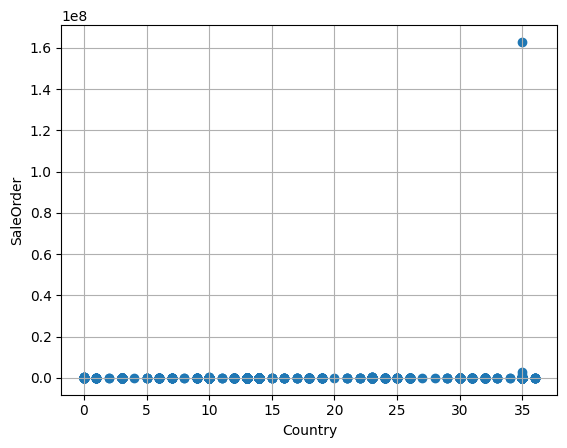

In [19]:
# ลอง plot Scatter ดูการกระจายข้อมูล
import matplotlib.pyplot as plt
plt.scatter(x_var,y_var)
plt.xlabel('Country')
plt.ylabel('SaleOrder')
plt.grid()
plt.show()
# สังเกตว่าหมายเลข 35(United Kingdom) มีจำนวน Order และ ยอด Order เยอะกว่าประเทศอื่นๆ

In [23]:
import numpy as np
#เปลี่ยนข้อมูลให้อยู่ในรูป Array
x = np.array(x_var)
y = np.array(y_var)

In [25]:
#แปลงข้อมูลให้อยู่ในรูป 2 มิติ เพื่อใช้ Train ใน Model
x = x.reshape(-1,1)
x

array([[35],
       [35],
       [35],
       ...,
       [35],
       [35],
       [13]])

In [26]:
#แปลงข้อมูลให้อยู่ในรูป 2 มิติ เพื่อใช้ Train ใน Model
y = y.reshape(-1,1)
y

array([[2305.2 ],
       [ 368.64],
       [4622.16],
       ...,
       [5467.68],
       [5623.2 ],
       [4138.08]])

In [27]:
# สร้าง Model Regression และ Train Model  
from sklearn.linear_model import LinearRegression

model = LinearRegression()  # เริ่มสร้าง Model (instantiate)
model.fit(x, y) # ป้อนข้อมูล x y ให้ computer เรียนรู้แล้วสร้าง Model 

LinearRegression()

In [30]:
# Access the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)
# จะได้สมการ Regression คือ y = 169.66X + 11152.94  จากสมการเมื่อค่า X เพิ่มขึ้น ค่า Y จะเพิ่มขึ้นตาม

Coefficients: [[169.66248194]]
Intercept: [11152.93992512]


In [32]:
# ทดลองให้ Model ทำนายค่าจากการใส่รหัสประเทศต่างๆ
model.predict([[35], [0], [19]])  # ต้องเป็น input 2D มี [[]] (วงเล็บสี่เหลี่ยม 2 ชั้น)

array([[17091.12679318],
       [11152.93992512],
       [14376.52708207]])